In [1]:
from LDA import LDA
import numpy as np
import matplotlib.pyplot as plt
from DecisionThreshold import DecisionThreshold
from scipy.stats import norm
import statistics
import math

In [2]:
X1 = np.array([[2, 3, 4, 3, 5, 5, 2, 4, 0, 6],[3, 2, 4, 2, 4, 3, 8, 6, 0, 5]]).T
X2 = np.array([[7, 9, 10, 11, 9, 13, 9, 11, 11, 10],[16, 15, 13, 11, 17, 13, 14, 15, 14, 12]]).T

#X1 = np.array([[4, 2, 2, 3, 4],[1, 4, 3, 6, 4]]).T
#X2 = np.array([[9, 6, 9, 8, 10],[10, 8, 5, 7, 8]]).T
xtest = np.array([[4, 10, 10],[0, 2.5, 12.5]]).T

[mu_Y1, mu_Y2, Var_Y1, Var_Y2, w, Y1, Y2] = LDA(X1,X2)

mu1 = [3.4 3.7]
mu2 = [10. 14.]
S1 = [[28.4 13.2]
 [13.2 46.1]]
S2 = [[ 24. -15.]
 [-15.  30.]]
Sw = [[52.4 -1.8]
 [-1.8 76.1]]
SB = [[0.01909949 0.00045176]
 [0.00045176 0.01315129]]
w = [0.68651515 0.7271155 ]
Y1 = [3.5543768  3.51377644 5.65452259 3.51377644 6.34103774 5.61392224
 7.18995432 7.1087536  0.         7.75466839]
Y2 = [16.43945407 17.08536886 16.317653   15.54993714 18.53959987 18.37719843
 16.35825336 18.45839915 17.73128365 15.59053749]
mu_Y1 = 5.0244788565704965
Var_Y1 = 5.65957526356818
mu_Y2 = 17.044768500435286
Var_Y2 = 1.355211951956043


In [3]:
[s1, s2] = DecisionThreshold(0.5, mu_Y1, mu_Y2, Var_Y1, Var_Y2)
if min(mu_Y1, mu_Y2) <= s1 <= max(mu_Y1, mu_Y2):
    threshold = s1
    print("s1 is between mu_Y1 and mu_Y2.")
else:
    threshold = s2
    print("s2 is between mu_Y1 and mu_Y2.")

a = 4.304363311612137
b = -179.31383275906975
c = 1599.067026399569
s1 = 28.72621146590988
s2 = 12.93240788792676
s2 is between mu_Y1 and mu_Y2.


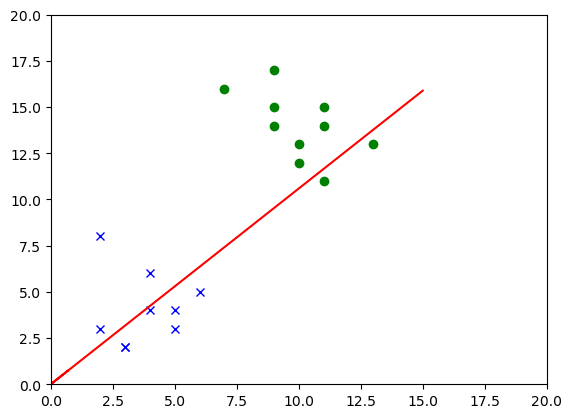

In [4]:
#Original datapoints and w vector

plt.figure()

#Xtest = np.array([[4, 10, 10],[0, 2.5, 12.5]]).T

#print(Xtest)

plt.plot(X1[:,0], X1[:,1], 'bx')
plt.plot(X2[:,0], X2[:,1], 'go')
#plt.plot(Xtest[:,0], Xtest[:,1], 'go')

#plt.xlabel("x1")
#plt.ylabel("y1")

plt.xlim(xmin = 0, xmax = 20)
plt.ylim(ymin = 0, ymax = 20)

x = [w[0],0]
#print(x)
y = [w[1],0]
#print(y)

m = y[0]/x[0]

x_int = 15
y_int = 15*m

x = np.concatenate( (x, [x_int] ) )
y = np.concatenate( (y, [y_int] ) )
    
plt.plot(x, y, c = "red")
    
plt.show()

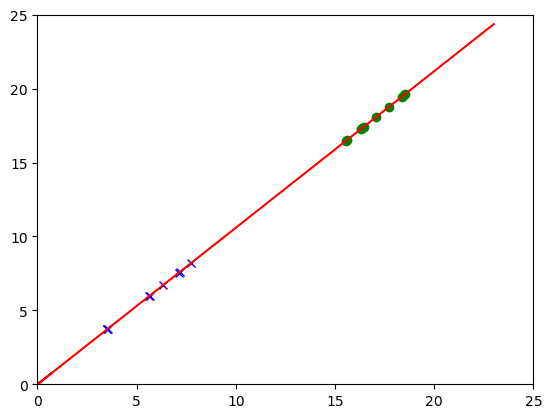

In [5]:
#Datapoints projected on w vector

plt.figure()

x = [w[0],0]
y = [w[1],0]

m = y[0]/x[0]

X1 = np.matmul(X1,w)
X2 = np.matmul(X2,w)

Y1 = []
Y2 = []

for x1 in X1:
    Y1.append(x1*m)

for x2 in X2:
    Y2.append(x2*m)
    
plt.plot(X1[:], Y1[:], 'bx')
plt.plot(X2[:], Y2[:], 'go')

plt.xlim(xmin = 0, xmax = 25)
plt.ylim(ymin = 0, ymax = 25)

x_int = 23
y_int = 23*m

x = np.concatenate( (x, [x_int] ) )
y = np.concatenate( (y, [y_int] ) )
    
plt.plot(x, y, c = "red")
plt.show()

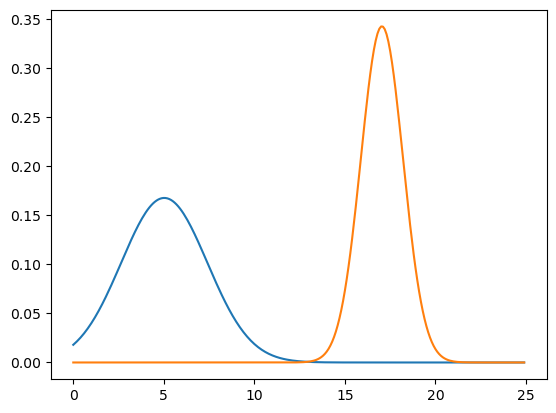

In [6]:
x_axis = np.arange(0, 25, 0.1)

fy1 = norm.pdf(x_axis, mu_Y1, math.sqrt(Var_Y1))
fy2 = norm.pdf(x_axis, mu_Y2, math.sqrt(Var_Y2))

plt.plot(x_axis, fy1)
plt.plot(x_axis, fy2)

plt.show()

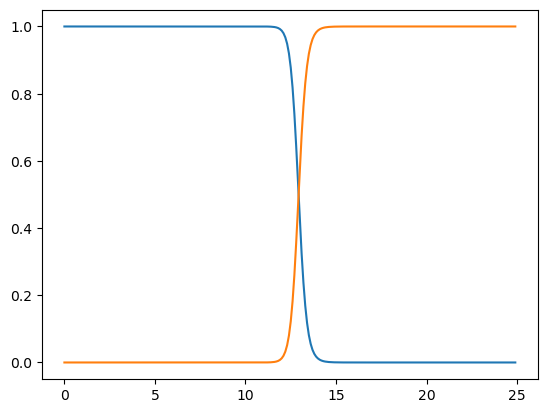

In [7]:
sigmoid1 = (fy1)*(0.5)/((fy1)*(0.5)+(fy2)*(0.5))
sigmoid2 = (fy2)*(0.5)/((fy1)*(0.5)+(fy2)*(0.5))

values = np.arange(0, 25, 0.1)

plt.plot(values, sigmoid1)
plt.plot(values, sigmoid2)

In [8]:
#Classification

xtest = xtest@w
print(xtest)

y = 0
for x in xtest:
    y = y + 1
    if x <= threshold:
        print("The " + str(y) + " datapoint is class 1")
    else:
        print("The " + str(y) + " datapoint is class 2")

[ 2.74606058  8.68294021 15.95409525]
The 1 datapoint is class 1
The 2 datapoint is class 1
The 3 datapoint is class 2
